# <font color='800000'>Serious Mental Illness Prediction with Regression Model </font>

### <div class="alert alert-block alert-info"><font color = 'blue'>1) Preliminary EDA & Feature Selection</font></div>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
full_df = pd.read_pickle('dataframe.pkl') 
#this file saves our dataframe so we don't have to run the 'collecting data file' that includes our scape methods


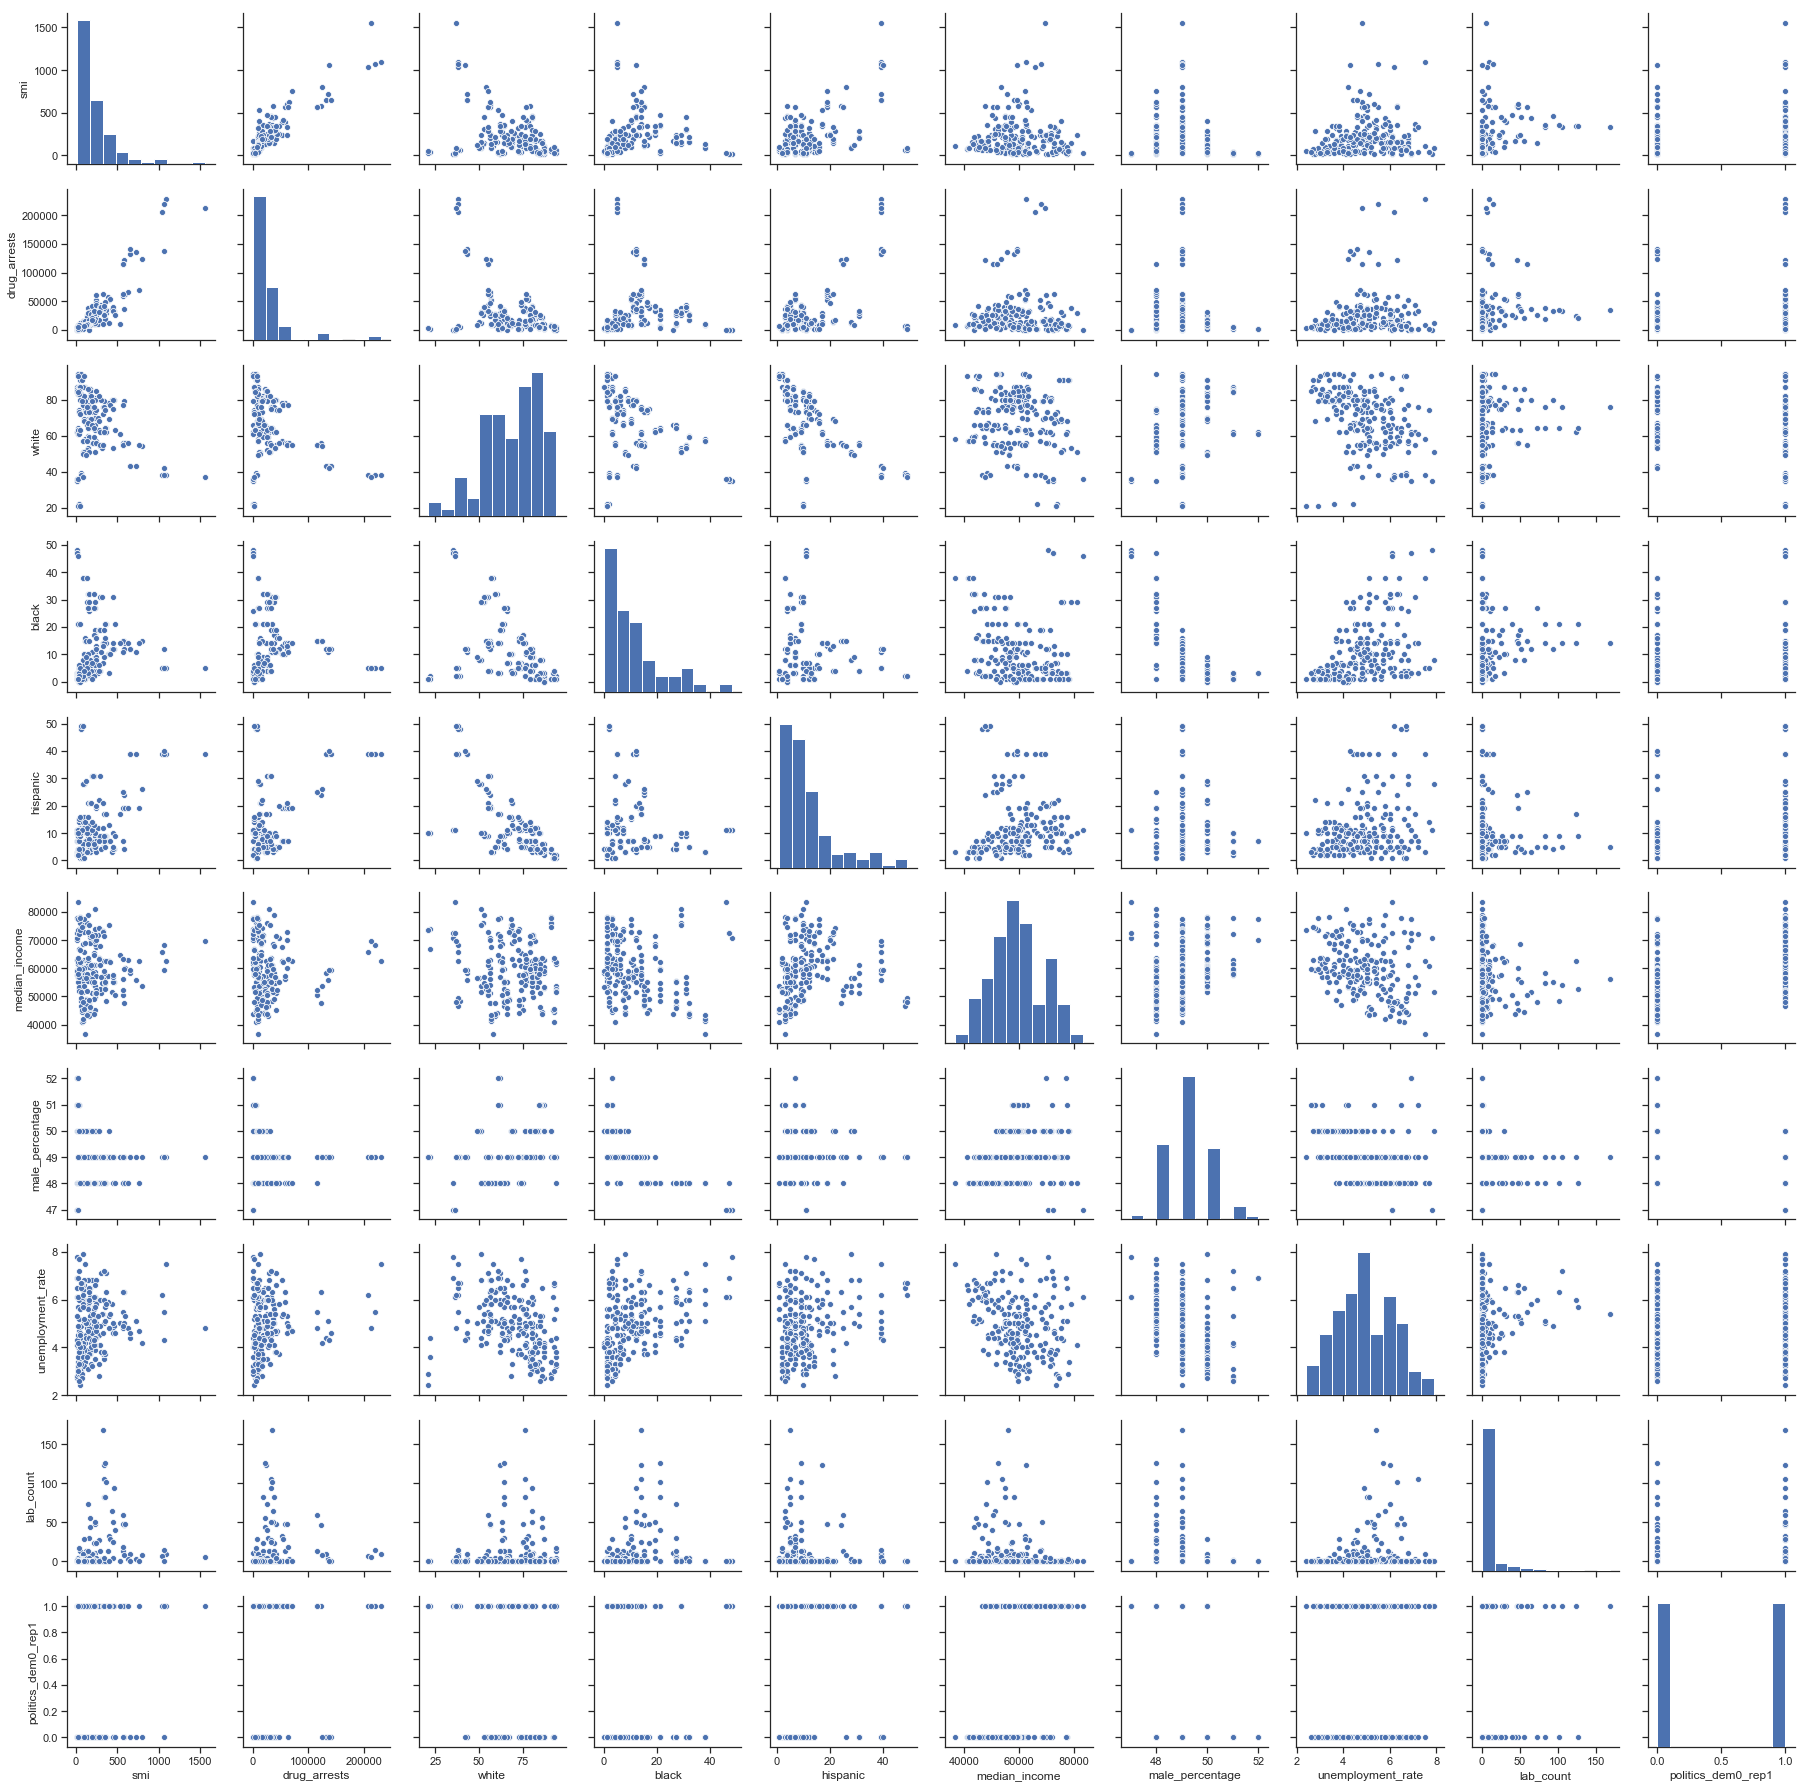

In [3]:
#look at scatter matrix to have overview if there are linear relationships
sns.set(style="ticks", color_codes=True)
sns.pairplot(full_df.iloc[:,3:]);

In [4]:
########################## Feature Selection ############################################

# do this to see what features to get rid of; you don't want highly correlated features
corr = full_df.corr()
abs(corr) > 0.75 #choose 75 as cutoff to see if the features are highly correlated w/one another

,year,rmhs,smi,drug_arrests,white,black,hispanic,median_income,male_percentage,unemployment_rate,lab_count,politics_dem0_rep1
year,True,False,False,False,False,False,False,False,False,False,False,False
rmhs,False,True,True,True,False,False,False,False,False,False,False,False
smi,False,True,True,True,False,False,False,False,False,False,False,False
drug_arrests,False,True,True,True,False,False,False,False,False,False,False,False
white,False,False,False,False,True,False,False,False,False,False,False,False
black,False,False,False,False,False,True,False,False,False,False,False,False
hispanic,False,False,False,False,False,False,True,False,False,False,False,False
median_income,False,False,False,False,False,False,False,True,False,False,False,False
male_percentage,False,False,False,False,False,False,False,False,True,False,False,False
unemployment_rate,False,False,False,False,False,False,False,False,False,True,False,False


#### <font color='black'>_the result of the table above tells us that we can keep all our features thus far_</font>

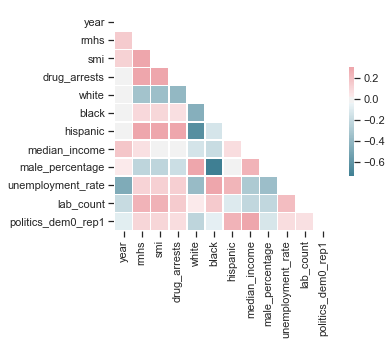

In [5]:
# can also look at heat maps to see correlation. don't want variables that have colors at 
# either spectrum
mask = np.zeros_like(corr, dtype=np.bool)
cmap = sns.diverging_palette(220, 10, as_cmap=True) #sets the color
mask[np.triu_indices_from(mask)] = True 

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

### <div class="alert alert-block alert-info"><font color = 'blue'>2.1) Linear Regression Model - iteration 1</font></div>

#### Here are the descriptions of our  model:
    - test size = 20% of our data 


If you have multiple predictor variables in a regression, here is advice from Tabachnick & Fidell, Using Multivariate Statistics (k is the number of predictors)

- a minimum N > 50 + (8*k) for tests of multiple R
- a minimum N > 104 + k for tests of individual predictors

In [6]:
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import datasets, linear_model
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn import metrics, preprocessing


In [7]:
#split your dataframe into the y's (target) and x's (features)

target = full_df.smi # our target is SMI column
features = full_df.iloc[:,4:] # our features is the full_df, minus the SMI column

In [8]:
######################## Split data into Testing & Training pools #############################

# set random_state so that you pick the exact same things every time you run your model
# choose a test size of 0.2 --> 20% of all your data will be used to train model

x_train, x_test, y_train, y_test = train_test_split(features, \
                                                    target, random_state=1989,test_size=0.2)


In [9]:
x = x_train
y = y_train

x_sm = sm.add_constant(x) # statsmodel (sm) adds y intercept to the linear regressions formula
sm_model = sm.OLS(y, x_sm).fit() # make your model

sm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    smi   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     80.47
Date:                Sun, 09 Dec 2018   Prob (F-statistic):           1.84e-53
Time:                        20:29:33   Log-Likelihood:                -975.19
No. Observations:                 163   AIC:                             1970.
Df Residuals:                     153   BIC:                             2001.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                919.9607    749.159      1.228      0.221    -560.070    2399.992
drug_arrests           0.0052      0.000     20.474      0.000       0.005       0.006
white                  0.5693      0.921      0.618      0.537      -1.250       2.389
black                  0.3199      1.400      0.228      0.820      -2.446       3.086
hispanic               1.5086      1.412      1.068      0.287      -1.282       4.299
median_income          0.0012      0.001      0.993      0.322      -0.001       0.003
male_percentage      -18.8815     15.506     -1.218      0.225     -49.514      11.751
unemployment_rate    -10.5320      8.278     -1.272      0.205     -26.887       5.823
lab_count              1.1323      0.328      3.449      0.001       0.484       1.781
politics_dem0_rep1    -3.2149     21.875     -0.147      0.883     -46.431      40.001
==============================================================================
Omnibus:                       49.982   Durbin-Watson:                   1.913
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              107.602
Skew:                           1.365   Prob(JB):                     4.31e-24
Kurtosis:                       5.897   Cond. No.                     6.54e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.54e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<div class="alert alert-block alert-success">
Our R-squared, from the model is 0.826. That's a good fit, but if you look at the p-values for the featured variables, they're way above 0.05. We decided to scale our split data (train set and test set) and use a polynomial fit with a degree = 2.
</div>

### <div class="alert alert-block alert-info"><font color = 'blue'>2.2) Linear Regression Model - iteration 2</font></div>

#### Here are the descriptions of the model:
    - test size = 20% of our data 
    - scaled our data with preprocessing.StandardScaler
    - used polynomial fit with degree of 2


In [10]:
#scale the features, except your dummy variable, to linearize relationships that may not be linear

scaler = preprocessing.StandardScaler()
scaler.fit(x_train.iloc[:, :-1]) #computes the mean and std. dev. to be used for later scaling


features_scaled_train = pd.DataFrame(scaler.transform(x_train.iloc[:,:-1]), \
                                     columns=x_train.columns[:-1], index=x_train.index) #transform the data per standardization
features_scaled_train['politics_dem0_rep1'] = x_train.politics_dem0_rep1 # have to add our categorical variable back in because we didn't want to scale this

features_scaled_test = pd.DataFrame(scaler.transform(x_test.iloc[:,:-1]), \
                                    columns=x_test.columns[:-1], index=x_test.index)
features_scaled_test['politics_dem0_rep1'] = x_test.politics_dem0_rep1

features_scaled_test.head()

,drug_arrests,white,black,hispanic,median_income,male_percentage,unemployment_rate,lab_count,politics_dem0_rep1
95,-0.303997,0.666629,-0.953873,0.210961,0.956823,1.118831,-1.144385,-0.435129,0
5,-0.344598,0.049590,-0.683471,0.881452,0.404693,1.118831,0.034616,-0.397017,1
0,-0.693385,-0.135521,1.299479,-0.746884,-1.575158,-1.175124,1.550474,-0.015899,0
121,-0.555312,1.592187,-0.863739,-0.938453,-0.742970,-0.028147,-0.975956,0.212771,1
100,-0.028673,0.851741,-0.503203,-0.459530,-0.190532,1.118831,-0.386456,-0.435129,1


In [11]:
# Polynomial fit our scaled train data. Because we have it has degree =2, our # of featured variables will increase
# We do this because some features don't have a linear relationship with the target variable. 
# We arbitrarily choose degree = 2 polynomial

poly = preprocessing.PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
# set interaction = False to output variables multiplying themselves. If it were set to true, you wouldn't get e.g. white^2

features_train = pd.DataFrame(poly.fit_transform(features_scaled_train), columns=poly.get_feature_names(features_scaled_train.columns))
pd.set_option('display.max_columns', 300) # used to look at all 300 columns. (we don't have 300)

features_test = pd.DataFrame(poly.fit_transform(features_scaled_test), \
                             columns=poly.get_feature_names(features_scaled_test.columns))

In [12]:
x = features_train
y = list(y_train)

x_sm = sm.add_constant(x) # statsmodel (sm) adds y intercept to the linear regressions formula
sm_model = sm.OLS(y, x_sm).fit() # make your model

sm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     24.74
Date:                Sun, 09 Dec 2018   Prob (F-statistic):           1.25e-41
Time:                        20:29:34   Log-Likelihood:                -908.30
No. Observations:                 163   AIC:                             1925.
Df Residuals:                     109   BIC:                             2092.
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                  306.2366     27.231     11.246      0.000     252.266     360.207
drug_arrests                           150.8499     57.008      2.646      0.009      37.862     263.838
white                                  -16.6603     82.155     -0.203      0.840    -179.489     146.169
black                                  119.7596     62.844      1.906      0.059      -4.796     244.315
hispanic                                57.2299     67.406      0.849      0.398     -76.367     190.827
median_income                           10.2055     30.987      0.329      0.743     -51.209      71.620
male_percentage                          8.6959     41.346      0.210      0.834     -73.250      90.642
unemployment_rate                      -51.8149     20.732     -2.499      0.014     -92.905     -10.725
lab_count                               23.1425     50.647      0.457      0.649     -77.239     123.524
politics_dem0_rep1                       6.4143     15.747      0.407      0.685     -24.796      37.625
drug_arrests^2                          -9.9564     23.897     -0.417      0.678     -57.319      37.406
drug_arrests white                    -491.9458    170.494     -2.885      0.005    -829.859    -154.033
drug_arrests black                    -435.8641    112.436     -3.877      0.000    -658.709    -213.019
drug_arrests hispanic                 -384.9898    117.428     -3.279      0.001    -617.728    -152.251
drug_arrests median_income            -160.9315     39.926     -4.031      0.000    -240.064     -81.799
drug_arrests male_percentage           -22.8703     39.708     -0.576      0.566    -101.569      55.829
drug_arrests unemployment_rate         -44.8538     15.110     -2.969      0.004     -74.800     -14.907
drug_arrests lab_count                 -53.2148     33.805     -1.574      0.118    -120.214      13.785
drug_arrests politics_dem0_rep1         52.4739     48.934      1.072      0.286     -44.513     149.460
white^2                               -106.6774     38.502     -2.771      0.007    -182.986     -30.369
white black                             54.9985    157.385      0.349      0.727    -256.932     366.930
white hispanic                          72.5895    159.452      0.455      0.650    -243.440     388.619
white median_income                    -40.8921     33.971     -1.204      0.231    -108.222      26.437
white male_percentage                   61.0224     69.819      0.874      0.384     -77.357     199.402
white unemployment_rate                -22.7956     26.351     -0.865      0.389     -75.023      29.432
white lab_count                        -26.5303    148.053     -0.179      0.858    -319.966     266.905
white politics_dem0_rep1              

<div class="alert alert-block alert-success">
Our R-squared, from this model is 0.923. This is better than our previous model. Now looking at the p-values, we have to get rid of the variables with p-value > 0.05. But because there are so many variables to look at, we'll use a Features Filtered Method: Variance Test.
</div>

### <div class="alert alert-block alert-info"><font color = 'blue'>2.3) Linear Regression Model - iteration 3</font></div>

#### Here are the descriptions of the model:
    - test size = 20% of our data 
    - scaled our data with preprocessing.StandardScaler
    - used polynomial fit with degree of 2
    - Filter Method: Variance Test, Correlation Threshold, and Information Selector
    - We also decided to look at MAE, MSE, RMSE, RMSE/sigma as indicators of a good model


- mean_absolute_error (MAE) = is a measure of difference between btw. two variables. for our purposes - test & predicted
- mean_squared_error (MSE) =  average squared difference between the estimated values and what is estimated. This accounts for outliers. More outliers means, bigger MSE, or more larger errors, penalizes big errors more
- root_mean_sqrt_squared_error (RMSE) = frequently used measure. Measures the differences between values (sample and population values) predicted by a model. This puts it back in the same unit as the variable it is measuring.
- RMSE/sigma of the test = tells you how many std. dev. you are from the mean of the real data

In [13]:
from sklearn.feature_selection import VarianceThreshold

In [14]:
# passes data with threshold and drops the variables that have variance lower than the threshold 
# (meaning value = 0 or lower than threshold)
# you do this to eliminate non-varying variables --> look at variance of each column (variable)

def variance_threshold_selector(data, threshold=0.5):
    # set threshold to 0.5 because it's standard
    selector = VarianceThreshold(threshold) #Feature selector that removes all low-variance features.
    selector.fit(data)
    return data[data.columns[selector.get_support(indices=True)]]

In [15]:
features_selected_train = variance_threshold_selector(features_train, threshold=0.7)

len(features_train.columns), len(features_selected_train.columns)
# as you can see, 14 variables were dropped (54 to 40) due to being below the threshold.
# this means their variance was lower than 0.7, meaning they didn't vary much over time over states

(54, 33)

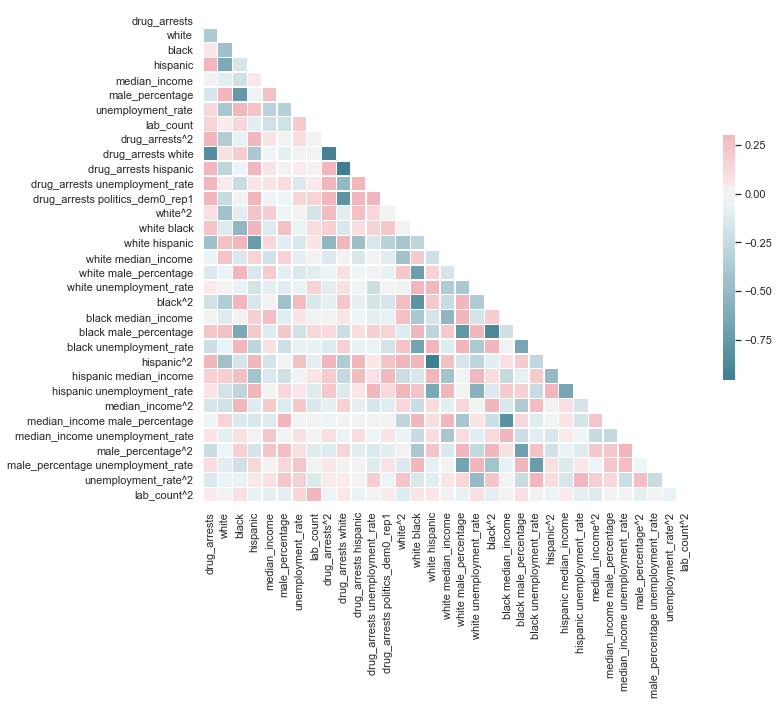

In [16]:
sns.set(style="white")

# Compute the correlation matrix
corr = features_selected_train.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

<div class="alert alert-block alert-success">
As you can see, there are some blocks with dark blue and red colors. We don't want dark blue nor red colors, because as indicated by the legend, this means the two variables making up that block are highly correlated. We then filter again, running our correlation values through a threshold of 0.95.
</div>

In [17]:
# Create correlation matrix
corr_matrix = features_selected_train.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
# we dont want features that are highly correlated with each other
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

features_selected_train.drop(columns=to_drop, inplace=True)

len(to_drop), len(features_selected_train.columns)
# as you can see, we dropped 1 variables. now we have 32 features

/Users/PB/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


(1, 32)

<div class="alert alert-block alert-warning">
We want to filter a little more, so we try the information selector.
</div>

In [18]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression, mutual_info_regression

In [19]:
def information_selector(X, Y, scoring, k=30):
    selector = SelectKBest(score_func=scoring, k=k)
    selector.fit(X, Y)
    return X[X.columns[selector.get_support(indices=True)]]

test = SelectKBest(score_func=mutual_info_regression, k=30)
fit = test.fit(features_selected_train, y_train)

features_selected_train[features_selected_train.columns[fit.get_support(indices=True)]].head()
len(features_selected_train.columns)
# our number of variables did not change. This indicates that thus far, all of our selected features are relevant

32

In [20]:
# fit a model
lm = linear_model.LinearRegression()
lm.fit(features_selected_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [21]:
features_selected_test = features_test[features_selected_train.columns]
y_pred = lm.predict(features_selected_test)

print(f'R^2: {lm.score(features_selected_train, y_train)}')
print(f'MAE: {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {metrics.mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}')
print(f'stddev: {np.sqrt(metrics.mean_squared_error(y_test, y_pred))/ y_test.std()}')

R^2: 0.8852692723903265
MAE: 53.45048506149804
MSE: 4553.983920697044
RMSE: 67.4832121397392
stddev: 0.33375623528132725


<div class="alert alert-block alert-warning">From our R-squared value and RMSE and stddev value, everything looks good. So let's visualize and see our p-values again for our features
</div>

/Users/PB/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


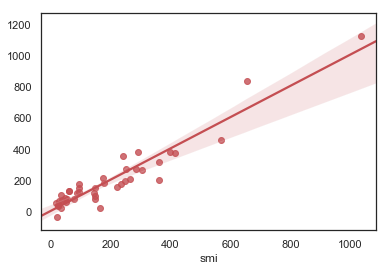

In [22]:
# Make a residual plot to visualize our models fit to the actual v. predicted data
sns.regplot(y_test, y_pred, color="r");


<div class="alert alert-block alert-warning">Our graph looks great, so now we look at p-values to ensure everything is okay.
</div>

In [23]:
x = features_selected_train
y_sm = list(y_train)

x_sm = sm.add_constant(x)
sm_model = sm.OLS(y_sm, x_sm).fit()

sm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     31.35
Date:                Sun, 09 Dec 2018   Prob (F-statistic):           8.32e-47
Time:                        20:29:35   Log-Likelihood:                -941.06
No. Observations:                 163   AIC:                             1948.
Df Residuals:                     130   BIC:                             2050.
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                               264.1038     15.672     16.852      0.000     233.099     295.108
drug_arrests                        199.0375     29.439      6.761      0.000     140.797     257.278
white                                 4.0532     45.624      0.089      0.929     -86.209      94.315
black                                10.8027     36.811      0.293      0.770     -62.023      83.629
hispanic                             77.4808     41.563      1.864      0.065      -4.746     159.708
median_income                        24.3091     11.858      2.050      0.042       0.850      47.768
male_percentage                     -19.5443     16.165     -1.209      0.229     -51.524      12.436
unemployment_rate                   -28.6751     11.867     -2.416      0.017     -52.152      -5.198
lab_count                            47.7998     19.030      2.512      0.013      10.152      85.448
drug_arrests^2                       -2.4852     14.323     -0.174      0.863     -30.822      25.852
drug_arrests white                   18.2653     32.249      0.566      0.572     -45.536      82.067
drug_arrests unemployment_rate      -10.1509     12.224     -0.830      0.408     -34.334      14.032
drug_arrests politics_dem0_rep1     -46.9812     26.189     -1.794      0.075     -98.793       4.831
white^2                             -80.7598     23.794     -3.394      0.001    -127.833     -33.687
white black                         181.6866     69.099      2.629      0.010      44.983     318.390
white hispanic                     -351.5957     81.762     -4.300      0.000    -513.351    -189.840
white median_income                 -40.7973     30.286     -1.347      0.180    -100.715      19.120
white male_percentage               108.1234     27.874      3.879      0.000      52.979     163.268
white unemployment_rate             -19.7671     23.275     -0.849      0.397     -65.814      26.280
black^2                             154.4283     51.292      3.011      0.003      52.953     255.904
black median_income                 -16.4997     26.042     -0.634      0.527     -68.020      35.021
black male_percentage                68.5907     33.694      2.036      0.044       1.932     135.249
black unemployment_rate             -24.2261     21.577     -1.123      0.264     -66.914      18.462
hispanic^2                         -203.4314     53.150     -3.828      0.000    -308.581     -98.281
hispanic median_income              -15.0727     28.081     -0.537      0.592     -70.628      40.483
hispanic unemployment_rate          -56.0469     24.451     -2.292      0.024    -104.420      -7.673
median_income^2                     -24.4308      9.436     -2.589      0.011     -43.098      -5.763
median_income male_perc

<div class="alert alert-block alert-success">
As you can see from the p-values of most of our features, they're above 0.05. So now, let's try a wrapper method.
</div>

### <div class="alert alert-block alert-info"><font color = 'blue'>2.4) Linear Regression Model - iteration 4</font></div>

#### Here are the descriptions of the model:
    - test size = 20% of our data 
    - scaled our data with preprocessing.StandardScaler
    - used polynomial fit with degree of 2
    - Filter Method: Variance Test, Correlation Threshold, and Information Selector
    - We also decided to look at MAE, MSE, RMSE, RMSE/sigma as indicators of a good model
    - Wrapper Method: RFE

- wrapper methods are like filter methods, except they account for interaction variables, they take up more computational time, and suppose to run multiple times to get best features
(recursive feature elimination, sequential feature selection)

In [24]:
from sklearn.feature_selection import RFE

In [25]:
rfe = RFE(lm, n_features_to_select= 5) # feature ranking with recursive feature elimination
rfe.fit(features_selected_train, y_train)

def ranking(ranks, names, order = 1):
    ranks = map(lambda x: round(x,2), ranks)
    return list(sorted(zip(ranks, names),reverse=True))

rankings = ranking(np.abs(lm.coef_), features_selected_train.columns) #returns list of tuples in form of (coeff,feature)
final_columns = [item[1] for item in rankings[0:15]] # just want top 15 features by coefficients. the higher the coefficient, the more impact it has on the model


In [26]:
#fit a model
lm = linear_model.LinearRegression()
model = lm.fit(features_selected_train[final_columns], y_train)

features_selected_test = features_selected_test[final_columns]
y_pred = model.predict(features_selected_test)

print(f'R^2: {model.score(features_selected_train[final_columns], y_train)}')
print(f'MAE: {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {metrics.mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}')
print(f'stddev: {np.sqrt(metrics.mean_squared_error(y_test, y_pred))/ y_test.std()}')

R^2: 0.8649205970929036
MAE: 56.94232616917218
MSE: 5057.743543627794
RMSE: 71.1178145307334
stddev: 0.35173213139384185


<div class="alert alert-block alert-warning">Our R-squared is stil good, and the std.dev. value means our predicted is 0.3 standard deviations away from the real. Now let's look at our selected features' p-values.
</div>

In [27]:
x = features_selected_train[final_columns]
y_sm = list(y_train)

x_sm = sm.add_constant(x)
sm_model = sm.OLS(y_sm, x_sm).fit()

sm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     62.75
Date:                Sun, 09 Dec 2018   Prob (F-statistic):           4.93e-56
Time:                        20:29:35   Log-Likelihood:                -954.37
No. Observations:                 163   AIC:                             1941.
Df Residuals:                     147   BIC:                             1990.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                               252.4429     11.029     22.889      0.000     230.647     274.239
white hispanic                     -266.1835     57.744     -4.610      0.000    -380.300    -152.067
hispanic^2                         -161.8684     36.234     -4.467      0.000    -233.476     -90.261
drug_arrests                        202.8086     17.448     11.624      0.000     168.328     237.290
white black                         158.0379     32.356      4.884      0.000      94.095     221.981
black^2                             129.9755     25.662      5.065      0.000      79.260     180.691
white male_percentage                78.3164     21.566      3.631      0.000      35.697     120.936
white^2                             -65.8071     13.416     -4.905      0.000     -92.319     -39.295
hispanic                             63.5835     17.142      3.709      0.000      29.708      97.459
black male_percentage                56.7368     18.069      3.140      0.002      21.029      92.445
hispanic unemployment_rate          -35.6467     10.376     -3.436      0.001     -56.151     -15.142
lab_count                            31.1732      7.954      3.919      0.000      15.455      46.891
drug_arrests politics_dem0_rep1     -64.9668     21.322     -3.047      0.003    -107.104     -22.829
white median_income                  -6.0180      9.912     -0.607      0.545     -25.607      13.571
unemployment_rate                   -21.3310     10.020     -2.129      0.035     -41.133      -1.529
male_percentage unemployment_rate    27.3257      9.581      2.852      0.005       8.392      46.260
==============================================================================
Omnibus:                       29.771   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.419
Skew:                           0.918   Prob(JB):                     1.86e-11
Kurtosis:                       4.975   Cond. No.                         38.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<div class="alert alert-block alert-warning">Our p-values look well below 0.05, except for white*median_income. So let's get rid of that
</div>

/Users/PB/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


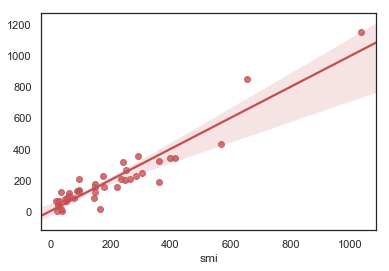

In [28]:
# Make a residual plot to visualize our models fit to the actual v. predicted data
sns.regplot(y_test, y_pred, color="r");


<div class="alert alert-block alert-success">
Our R-squared looks great, and most of our p-values are well below 0.05, except one variable. We decide to get rid of this variable.</div>

### <div class="alert alert-block alert-info"><font color = 'blue'>2.5) Linear Regression Model - iteration 5</font></div>

#### Here are the descriptions of the model:
    - test size = 20% of our data 
    - scaled our data with preprocessing.StandardScaler
    - used polynomial fit with degree of 2
    - Filter Method: Variance Test, Correlation Threshold, and Information Selector
    - We also decided to look at MAE, MSE, RMSE, RMSE/sigma as indicators of a good model
    - Wrapper Method: RFE
    - Include features with p-values <0.05

In [29]:
final_columns_final = ['white hispanic',
 'hispanic^2',
 'drug_arrests',
 'white black',
 'black^2',
 'white male_percentage',
 'white^2',
 'hispanic',
 'black male_percentage',
 'hispanic unemployment_rate',
 'lab_count',
 'drug_arrests politics_dem0_rep1',
 'unemployment_rate',
 'male_percentage unemployment_rate']

In [30]:
lm = linear_model.LinearRegression()
lm.fit(features_selected_train[final_columns_final], y_train)

features_selected_test = features_test[final_columns_final]
y_pred = lm.predict(features_selected_test)
y_linear = y_pred
print(lm.score(features_selected_train[final_columns_final], y_train))
print(f'MAE: {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {metrics.mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}')
print(f'std. RMSE: {np.sqrt(metrics.mean_squared_error(y_test, y_pred))/ y_test.std()}')

0.8645818927397821
MAE: 55.93198823916472
MSE: 5001.407674603195
RMSE: 70.72063118074665
std. RMSE: 0.3497677551378109


<div class="alert alert-block alert-warning">Our RMSE is 70.7, this means that on average we are 70.7 number of SMI cases away from the real data. Note. SMI in our table is measured in hundreds, but the data is in thousands
</div>

/Users/PB/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


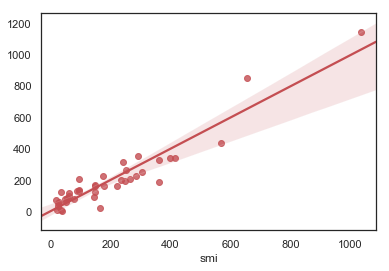

In [31]:
# Make a residual plot to visualize our models fit to the actual v. predicted data
sns.regplot(y_test, y_pred, color="r");

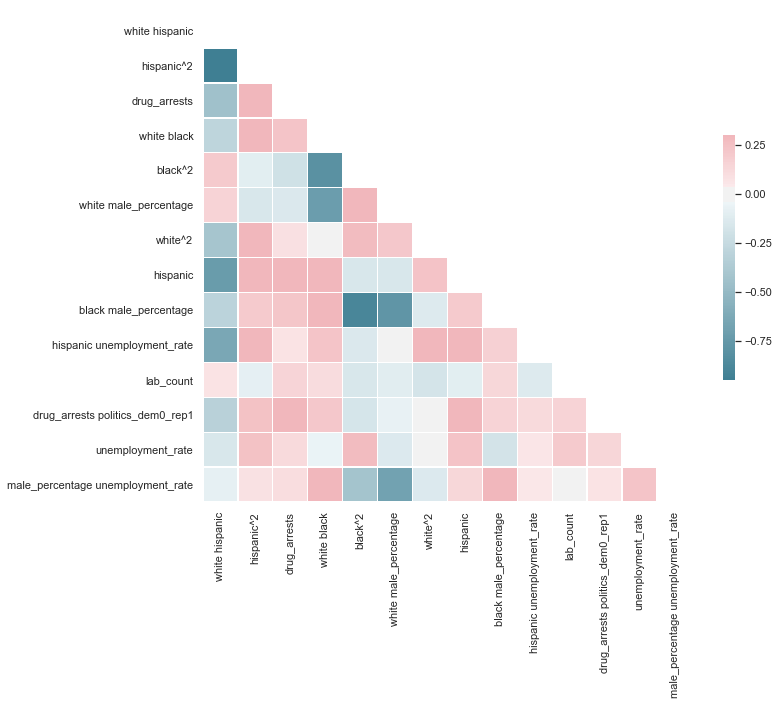

In [42]:
sns.set(style="white")

# Compute the correlation matrix
corr = features_selected_train[final_columns_final].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [32]:
x = features_selected_train[final_columns_final]
y_sm = list(y_train)

x_sm = sm.add_constant(x)
sm_model = sm.OLS(y_sm, x_sm).fit()

sm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     67.49
Date:                Sun, 09 Dec 2018   Prob (F-statistic):           7.05e-57
Time:                        20:29:36   Log-Likelihood:                -954.57
No. Observations:                 163   AIC:                             1939.
Df Residuals:                     148   BIC:                             1986.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                               251.5174     10.900     23.075      0.000     229.978     273.057
white hispanic                     -264.2192     57.530     -4.593      0.000    -377.906    -150.532
hispanic^2                         -162.0398     36.156     -4.482      0.000    -233.488     -90.591
drug_arrests                        201.2023     17.209     11.692      0.000     167.195     235.210
white black                         155.6582     32.049      4.857      0.000      92.326     218.991
black^2                             128.0016     25.401      5.039      0.000      77.805     178.198
white male_percentage                78.3935     21.520      3.643      0.000      35.868     120.919
white^2                             -61.8499     11.701     -5.286      0.000     -84.972     -38.728
hispanic                             64.8340     16.981      3.818      0.000      31.277      98.391
black male_percentage                56.0227     17.992      3.114      0.002      20.468      91.577
hispanic unemployment_rate          -37.8456      9.702     -3.901      0.000     -57.018     -18.673
lab_count                            31.3143      7.933      3.947      0.000      15.637      46.991
drug_arrests politics_dem0_rep1     -61.8534     20.652     -2.995      0.003    -102.664     -21.042
unemployment_rate                   -20.0928      9.789     -2.053      0.042     -39.438      -0.748
male_percentage unemployment_rate    28.2821      9.430      2.999      0.003       9.647      46.917
==============================================================================
Omnibus:                       30.465   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               50.472
Skew:                           0.940   Prob(JB):                     1.10e-11
Kurtosis:                       4.974   Cond. No.                         38.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<div class="alert alert-block alert-success">
Our R-squared value is 0.865, all the p-values of the features are lower than 0.05, and we are satisfied with our RMSE and stddev values. We therefore conclude our Regression Model Analysis and found our best fit model for our data.</div>

<div class="alert alert-block alert-success">$$ Serious Mental Illness = -264.22(white*hispanic) - 162.04(hispanic)^2 + 201.2(DrugArrests) + 155.66(white*black) + 128(black)^2 + 78.40(white*MalePercentage) -61.85(white)^2 + 64.83(hispanic) + 56.02(black*MalePercentage) - 37.85(hispanic*UnemploymentRate) + 31.31(LabCount) - 61.85(DrugArrests*politics) - 20.1(UnemploymentRate) + 28.28(MalePercentage*UnemploymentRate) + 251.52$$ </div>

### <div class="alert alert-block alert-info"><font color = 'blue'>3) Non-Exhaustive Cross Validation: K-Fold</font></div>

#### Here are the descriptions of our first model:
    - test size = 20% of our data 
    - scaled our data with preprocessing.StandardScaler
    - used polynomial fit with degree of 2
    - Variance Test
    - Wrapper Method - RFE
    - took features with p-values <0.05


K-Fold Cross Validation expands on the idea of training and testing splits by splitting the entire dataset into {K} equal sections of data. We'll then iteratively train {K} linear regression models on the data, with each linear model using a different section of data as the testing set, and all other sections combined as the training set.

We can then average the individual results frome each of these linear models to get a Cross-Validation MSE. This will be closer to the model's actual MSE, since "noisy" results that are higher than average will cancel out the "noisy" results that are lower than average.

In [33]:
from sklearn.model_selection import cross_val_score

cv_20_results = cross_val_score(lm, features_selected_train[final_columns_final], y_train, cv=20)
cv_20_results.mean(), cv_20_results.std()
# the results show the (average R-squared, std. dev) of our train dataset with our final linear regression model

(0.5799738110045848, 0.4104188681267139)

### <div class="alert alert-block alert-info"><font color = 'blue'>4) Ridge & Lasso Regression</font></div>

### Ridge regression (taken from Learn.co)

In **ridge regression**, the linear regression cost function is changed by adding a penalty term to square of the magnitude of the coefficients.

$$ \text{cost_function_ridge}= \sum_{i=1}^n(y_i - \hat{y})^2 = \sum_{i=1}^n(y_i - \sum_{j=1}^k(m_jx_{ij} + b))^2 + \lambda \sum_{j=1}^p m_j^2$$

Recall that you want to minimize your cost function, so by adding the penalty term $\lambda$, ridge regression puts a constraint on the coefficients $m$. This means that large coefficients penalize the optimization function. That's why ridge regression leads to a shrinkage of the coefficients and helps to reduce model complexity and multi-collinearity.


$\lambda$ is a so-called *hyperparameter*, which means you have to specify the value for lamda. For a small lambda, the outcome of your ridge regression will resemble a linear regression model. For large lambda, penalization will increase and more parameters will shrink.

Ridge regression is often also referred to as **L2 Norm Regularization**


In [34]:
from sklearn.linear_model import Ridge

In [35]:
# Ridge Method to Train Model

X_train_all = features_train
X_test_all = features_test

# training the model

ridgeReg = Ridge(alpha=.05, normalize=True)

ridge_model = ridgeReg.fit(X_train_all,y_train)

y_pred = ridgeReg.predict(X_test_all)
y_rid = y_pred

MSE: 5469.059003240812
RMSE: 73.95308650246325
R^2: 0.8899913461319253
std. RMSE: 0.3657547255958445


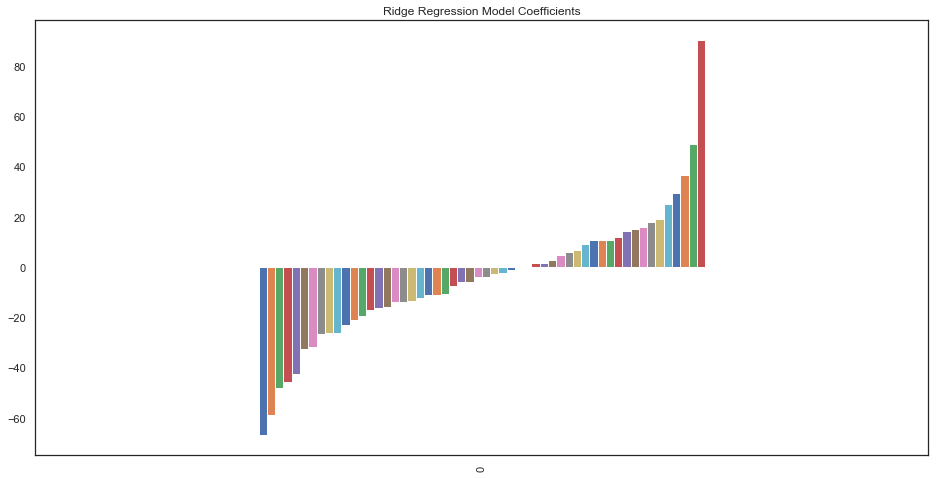

In [36]:
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2:', ridgeReg.score(X_train_all,y_train))
print('std. RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))/ y_test.std())

coef = pd.DataFrame(data=[ridgeReg.coef_], columns=X_train_all.columns )

model_coef = coef.T.sort_values(by=0).T # sort by rows

model_coef.plot(kind='bar', title='Ridge Regression Model Coefficients', legend=False, figsize=(16,8))


/Users/PB/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


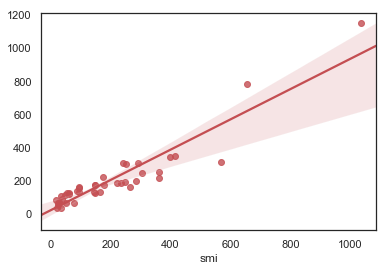

In [37]:
sns.regplot(y_test, y_pred, color="r");


### Lasso regression (taken from Learn.co)

**Lasso regression** is very similar to Ridge regression, except that the magnitude of the coefficients are not squared in the penalty term. So, while ridge regression keeps the sum of the squared regression coefficients (except for the intercept) bounded, the lasso method bounds the sum of the absolute values.

The resulting cost function looks like this:

$$ \text{cost_function_lasso}= \sum_{i=1}^n(y_i - \hat{y})^2 = \sum_{i=1}^n(y_i - \sum_{j=1}^k(m_jx_{ij} + b))^2 + \lambda \sum_{j=1}^p \mid m_j \mid$$

The name "Lasso" comes from ‘Least Absolute Shrinkage and Selection Operator’.

While looking similar to the definition of the ridge estimator, the effect of the absolute values is that some coefficients might be set exactly equal to zero, while other coefficients are shrunk towards zero. Hence the lasso method is attractive because it performs estimation *and* selection simultaneously. Especially for variable selection when the number of predictors is very high.

Lasso regression is often also referred to as **L1 Norm Regularization**


In [38]:
from sklearn.linear_model import Lasso

/Users/PB/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


MSE: 9047.727069229888
RMSE: 95.11954094312003
R^2: 0.8899913461319253
std. RMSE: 0.4704390748490903


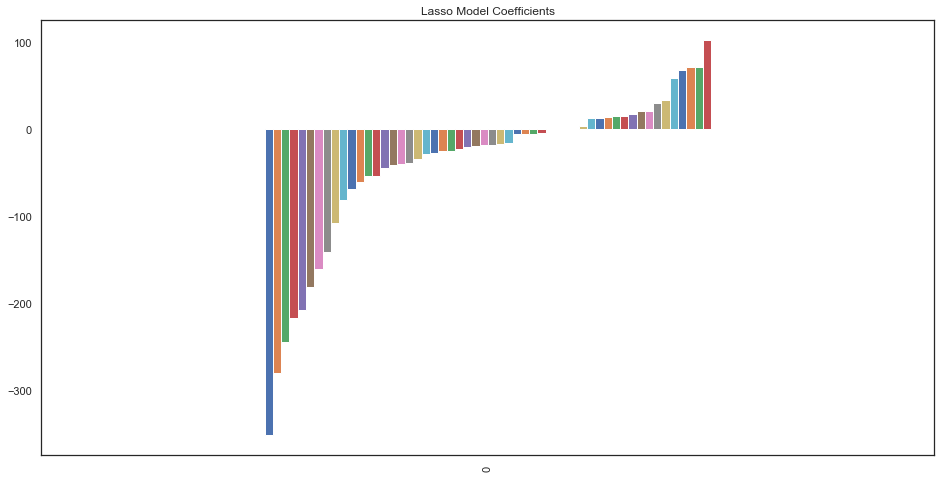

In [39]:
# Lasso Method

lassoReg = Lasso(alpha=0.05, normalize=False) # alpha is the punishment coefficient (lambda), 
# normalize = True normalizes the data, but we already normalized our data

lasso_model = lassoReg.fit(X_train_all,y_train)

y_pred = lassoReg.predict(X_test_all)
y_lasso = y_pred
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2:', ridgeReg.score(X_train_all,y_train))
print('std. RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))/ y_test.std())

coef = pd.DataFrame(data=lassoReg.coef_, index=X_train_all.columns )
model_coef = coef.sort_values(by=0).T

model_coef.plot(kind='bar', title='Lasso Model Coefficients', legend=False, figsize=(16,8));

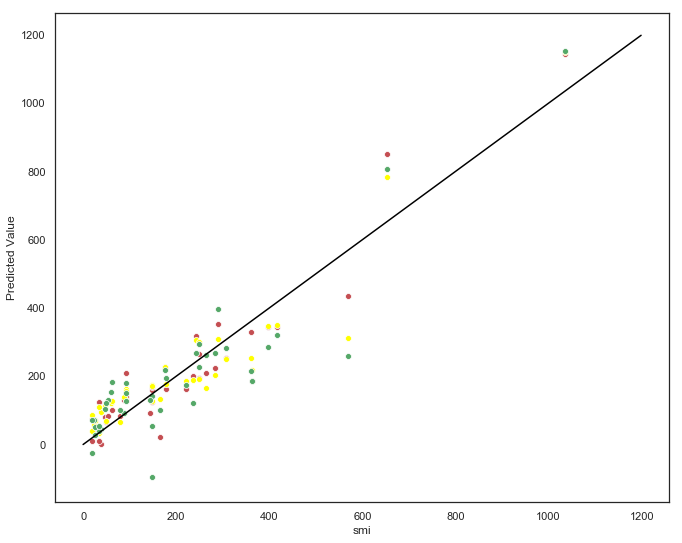

In [40]:
f, ax = plt.subplots(figsize=(11, 9))

ax.set(xlabel='Actual Value', ylabel='Predicted Value')
sns.scatterplot(y_test, y_linear, color='r')
sns.scatterplot(y_test, y_rid, color = 'yellow')
sns.scatterplot(y_test, y_lasso, color= 'g')
sns.lineplot(range(1200),range(1200), color='black')
